In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: This data is under a publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [281]:

def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)


    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (10,8)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
        plt.text(0,2, "Slope of regression: %s\nR-squared: %s\nPvalue: %s" %(slope,r_value**2,p_value))
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
    
    if save_file_name != "file_name":
        plt.savefig(save_file_name+'.png')
        
    
    

# Plots for EGFR and CCL20

In [36]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()

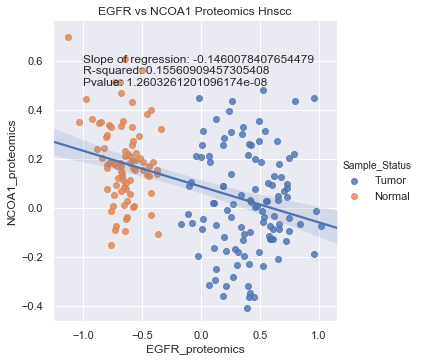

In [216]:
plot_lin_regression(df1_subset,"EGFR_proteomics","NCOA1_proteomics","Sample_Status", title = "EGFR vs NCOA1 Proteomics Hnscc", ra_stats = True, show_plot = True)

In [215]:
plot_lin_regression(df_gbm,"EGFR","CCL20","EGFR vs CCL20 Proteomics GBM", ra_stats = True,show_plot = True)

NameError: name 'df_gbm' is not defined

In [6]:
prot_df_kidney = Ccrcc.get_proteomics()
prot_df_kidney.columns = prot_df_kidney.columns.droplevel(1)

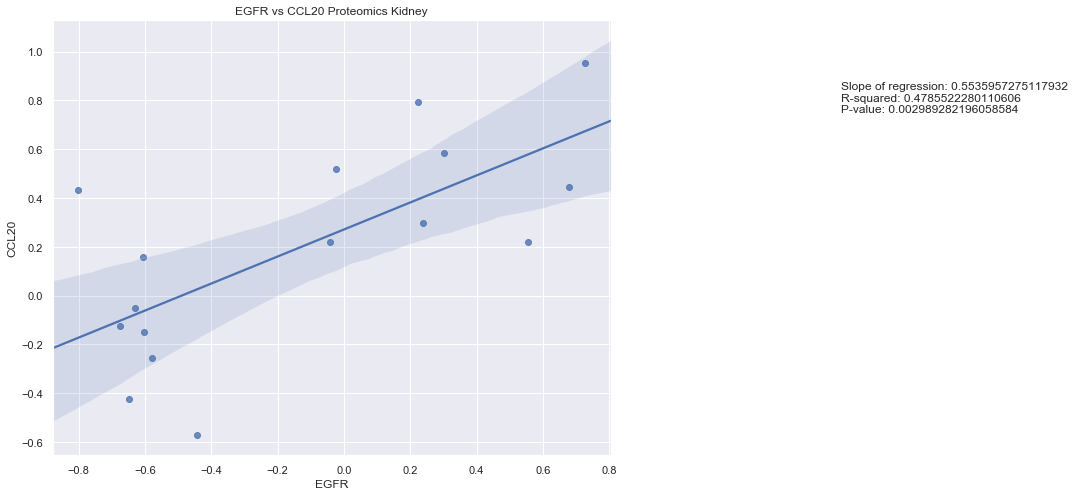

In [14]:
plot_lin_regression(prot_df_kidney,"EGFR","CCL20","EGFR vs CCL20 Proteomics Kidney", ra_stats = True,show_plot = True)

In [15]:
#prot_df_kidney[["CCL20","EGFR"]]

Name,CCL20,EGFR
Patient_ID,,
C3L-00004,NaN,0.254999
C3L-00010,NaN,0.526561
C3L-00011,NaN,0.268540
C3L-00026,NaN,0.578659
C3L-00079,NaN,0.662720
...,...,...
C3N-01646.N,NaN,-0.639513
C3N-01648.N,NaN,-0.721078
C3N-01649.N,NaN,-0.592099


In [17]:
prot_df_en = en.get_proteomics()

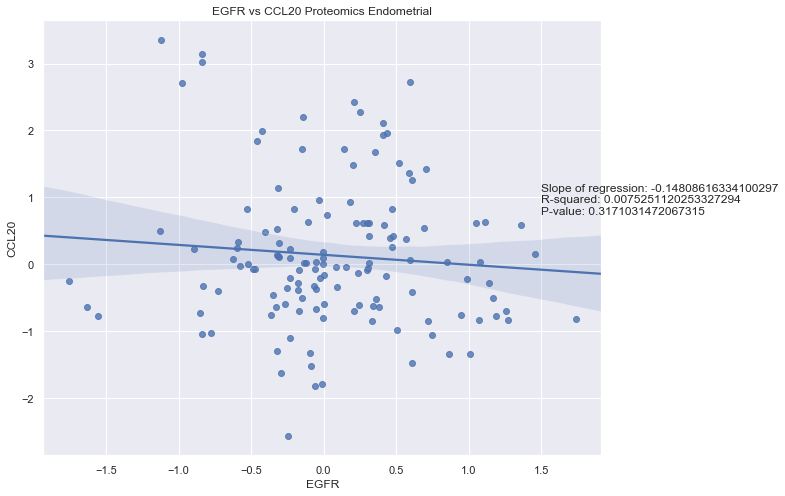

In [18]:
plot_lin_regression(prot_df_en,"EGFR","CCL20","EGFR vs CCL20 Proteomics Endometrial", ra_stats = True,show_plot = True)

In [19]:
prot_df = luad.get_proteomics()

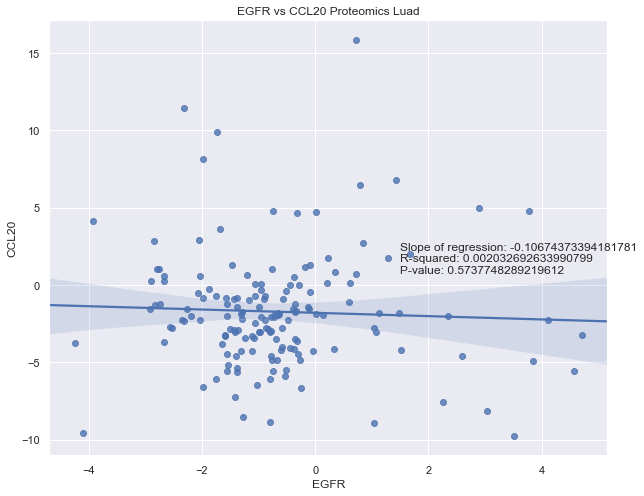

In [20]:
plot_lin_regression(prot_df,"EGFR","CCL20","EGFR vs CCL20 Proteomics Luad", ra_stats = True,show_plot = True)

In [22]:
prot_df = hnscc.get_proteomics()

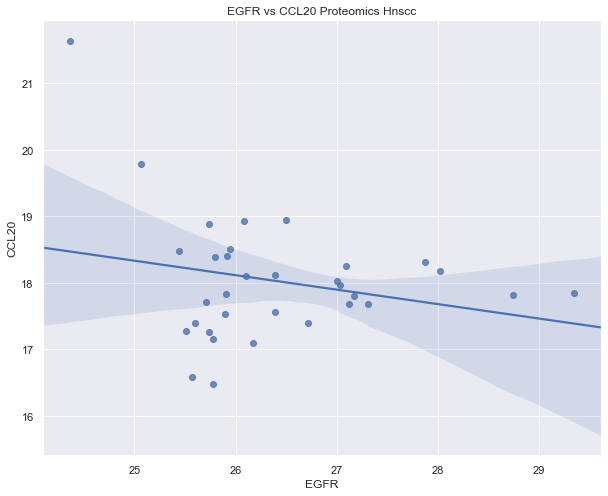

In [24]:
plot_lin_regression(prot_df,"EGFR","CCL20","EGFR vs CCL20 Proteomics Hnscc", ra_stats = False, show_plot = True)

In [11]:
prot_ovar = Ovar.get_proteomics()

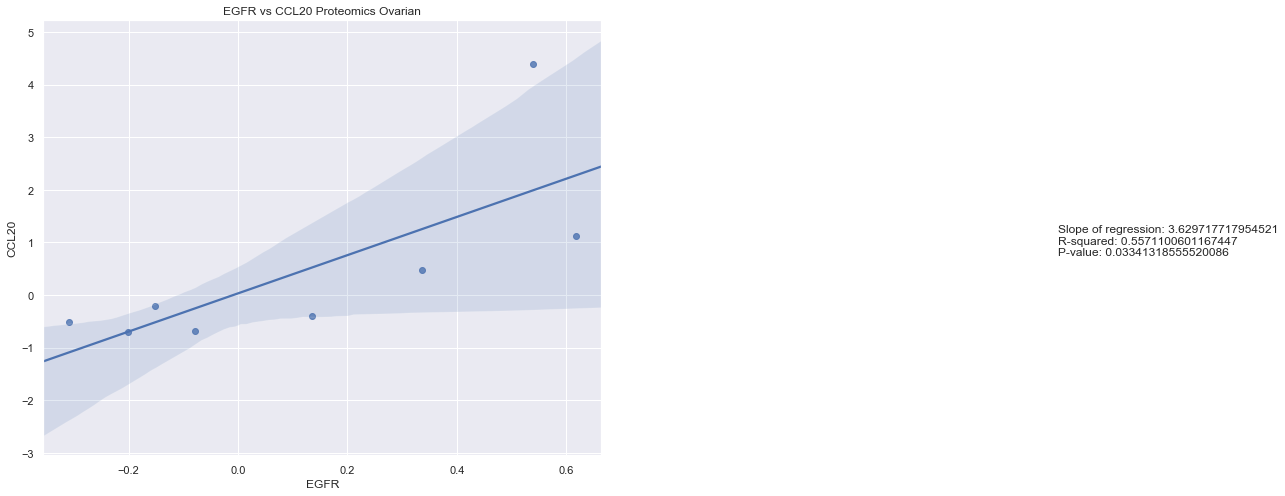

In [26]:
plot_lin_regression(prot_df,"EGFR","CCL20","EGFR vs CCL20 Proteomics Ovarian", ra_stats = True, show_plot = True)

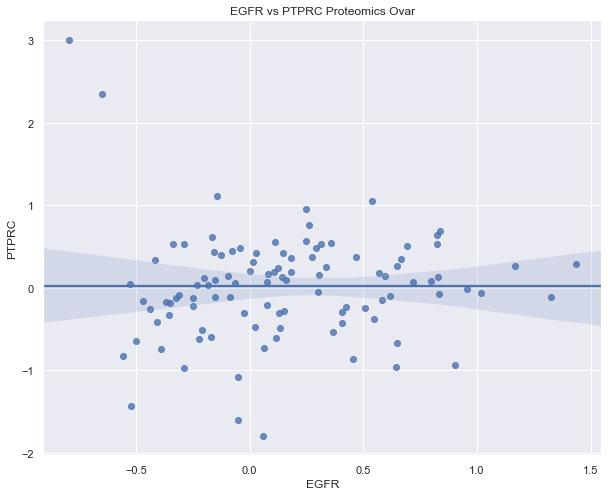

In [16]:

plot_lin_regression(prot_ovar,"EGFR","PTPRC","EGFR vs PTPRC Proteomics Ovar", ra_stats = False, show_plot = True)

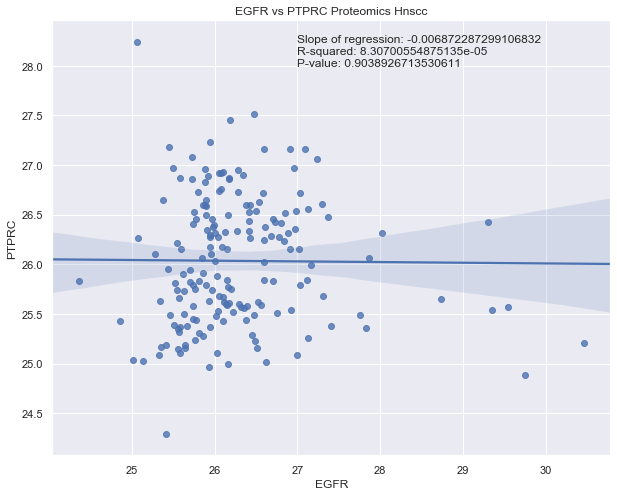

In [23]:
plot_lin_regression(prot_hnscc,"EGFR","PTPRC","EGFR vs PTPRC Proteomics Hnscc", ra_stats = True, show_plot = True)

In [43]:
prot_hnscc[["EGFR","PTPRC"]]

Name,EGFR,PTPRC
Patient_ID,,
C3L-00977,26.415671,26.433746
C3L-00987,26.388105,25.577008
C3L-00994,26.832596,26.233845
C3L-00995,25.865444,26.602108
C3L-00997,26.094205,26.177974
...,...,...
C3N-04275.N,25.945740,26.273046
C3N-04276.N,26.136652,25.601510
C3N-04277.N,25.769018,25.751004


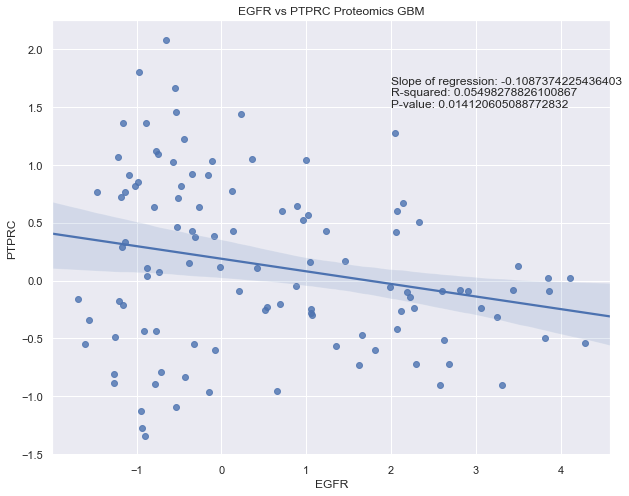

In [28]:
plot_lin_regression(prot_gbm,"EGFR","PTPRC","EGFR vs PTPRC Proteomics GBM", ra_stats = True, show_plot = True)

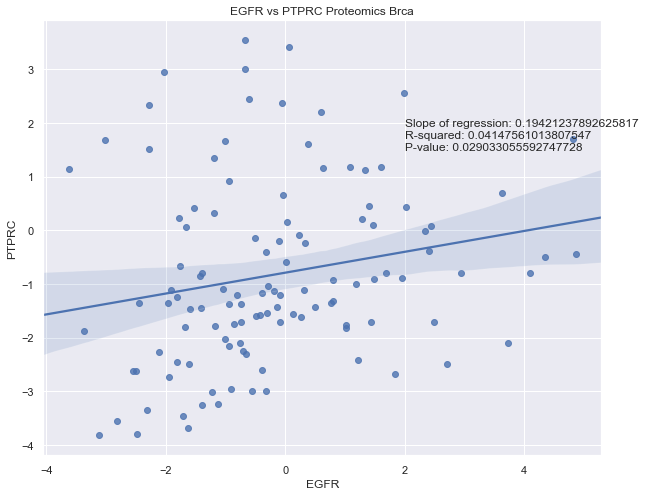

In [33]:
df1 = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PTPRC","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","PTPRC_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

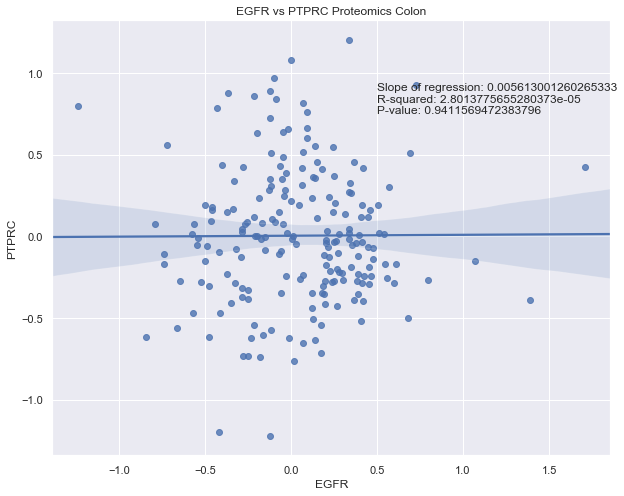

In [60]:
plot_lin_regression(prot_colon,"EGFR","PTPRC","EGFR vs PTPRC Proteomics Colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


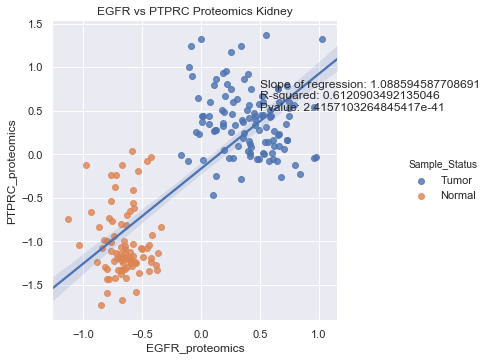

In [235]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PTPRC","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","PTPRC_proteomics", "Sample_Status",title = "EGFR vs PTPRC Proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


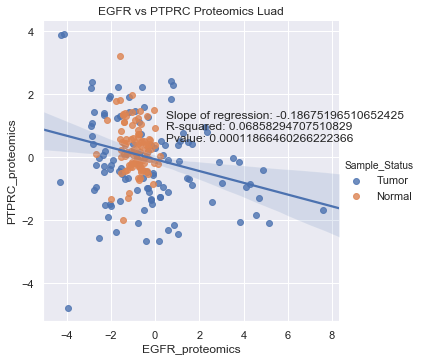

In [238]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["PTPRC","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","PTPRC_proteomics", "Sample_Status",title = "EGFR vs PTPRC Proteomics Luad", ra_stats = True, show_plot = True)

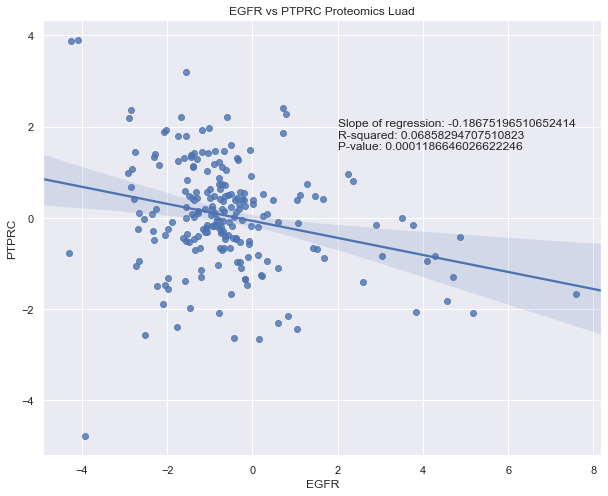

In [51]:
plot_lin_regression(prot_luad,"EGFR","PTPRC","EGFR vs PTPRC Proteomics Luad", ra_stats = True, show_plot = True)

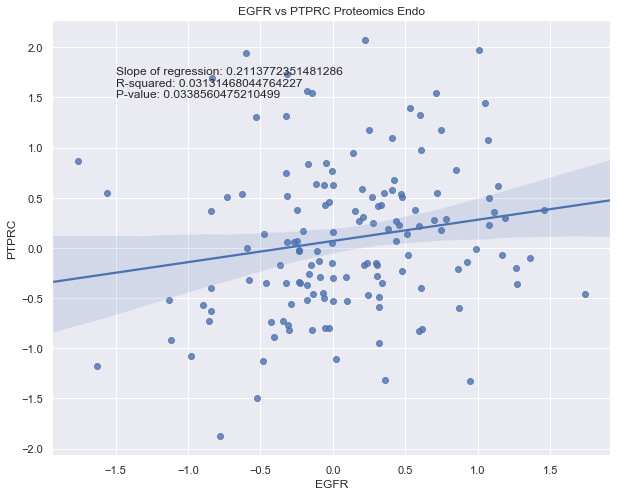

In [55]:
plot_lin_regression(prot_en,"EGFR","PTPRC","EGFR vs PTPRC Proteomics Endo", ra_stats = True, show_plot = True)

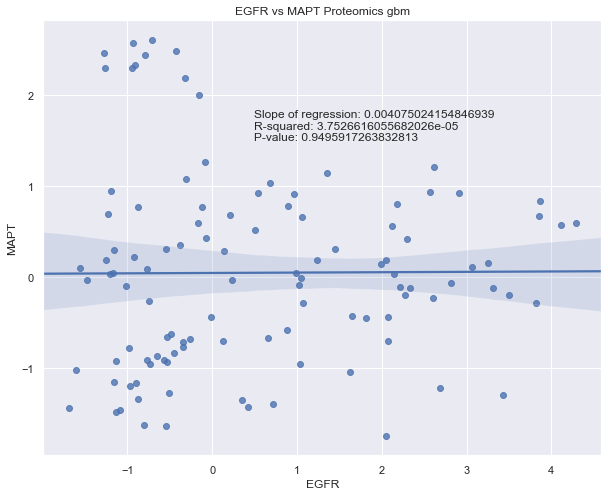

In [82]:
plot_lin_regression(prot_gbm,"EGFR","MAPT","EGFR vs MAPT Proteomics gbm", ra_stats = True, show_plot = True)



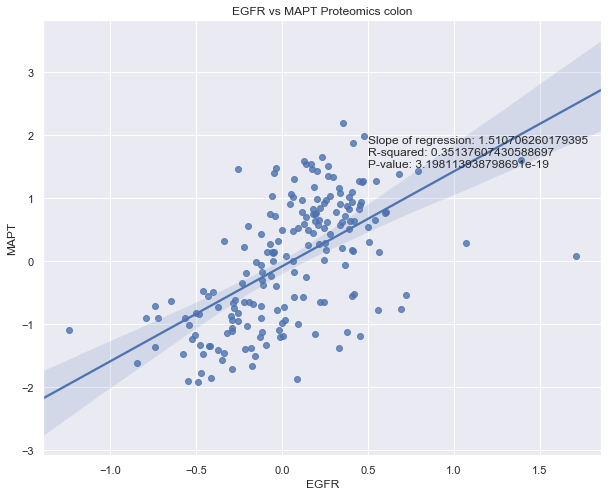

In [81]:
plot_lin_regression(prot_colon,"EGFR","MAPT","EGFR vs MAPT Proteomics colon", ra_stats = True, show_plot = True)

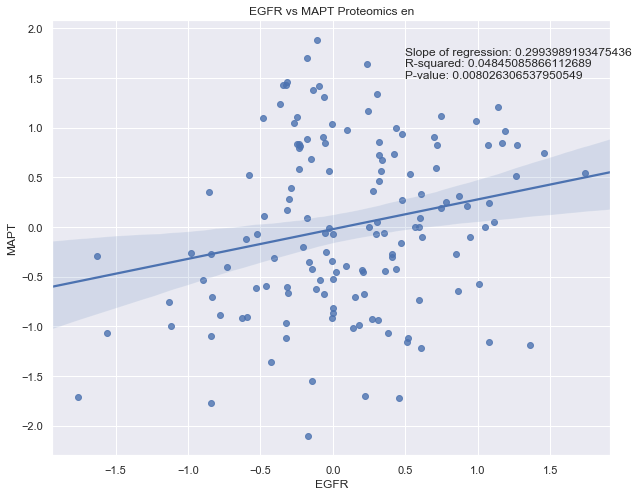

In [80]:
plot_lin_regression(prot_en,"EGFR","MAPT","EGFR vs MAPT Proteomics en", ra_stats = True, show_plot = True)

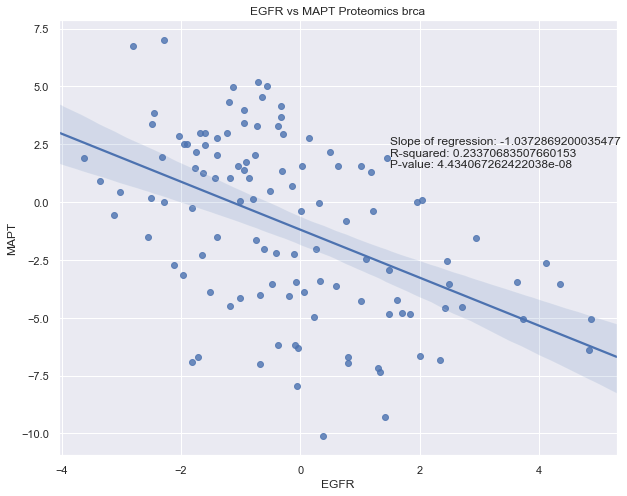

In [78]:
plot_lin_regression(prot_brca,"EGFR","MAPT","EGFR vs MAPT Proteomics brca", ra_stats = True, show_plot = True)


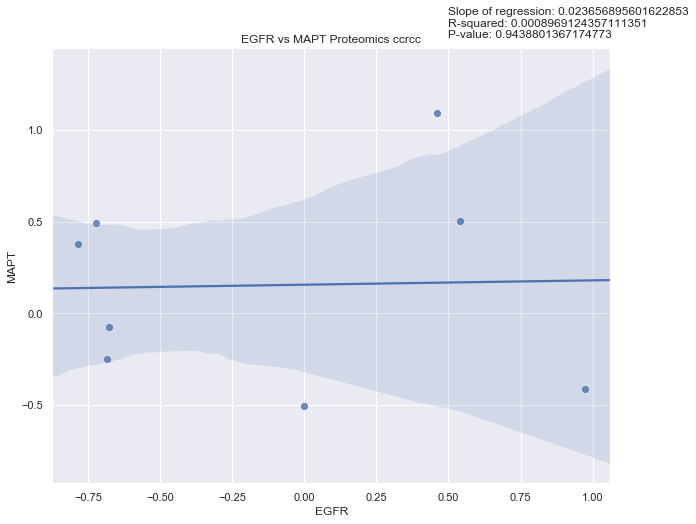

In [83]:
plot_lin_regression(prot_ccrcc,"EGFR","MAPT","EGFR vs MAPT Proteomics ccrcc", ra_stats = True, show_plot = True)

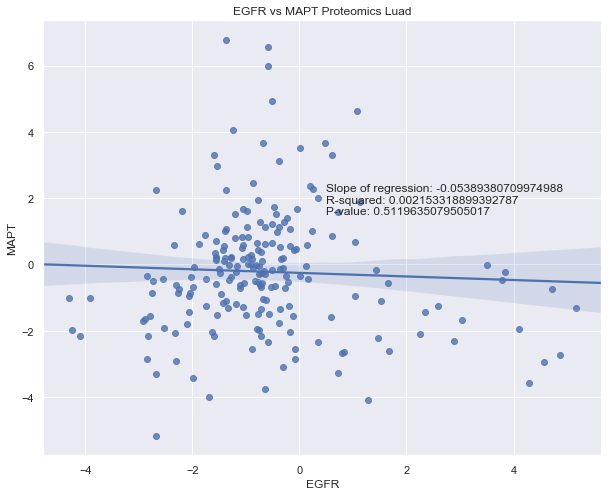

In [84]:
plot_lin_regression(prot_luad,"EGFR","MAPT","EGFR vs MAPT Proteomics Luad", ra_stats = True, show_plot = True)

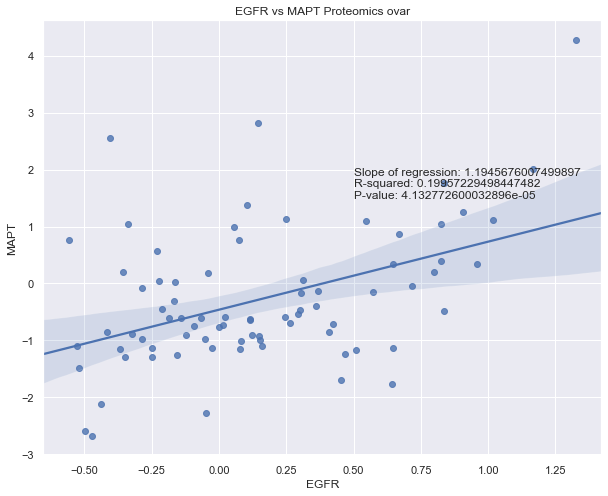

In [85]:
plot_lin_regression(prot_ovar,"EGFR","MAPT","EGFR vs MAPT Proteomics ovar", ra_stats = True, show_plot = True)

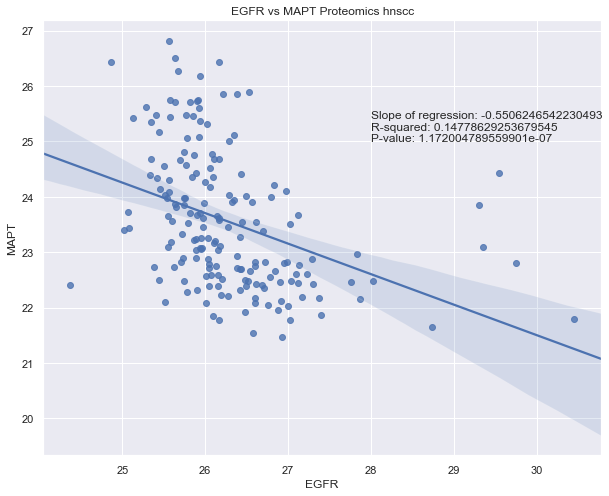

In [90]:
plot_lin_regression(prot_hnscc,"EGFR","MAPT","EGFR vs MAPT Proteomics hnscc", ra_stats = True, show_plot = True)

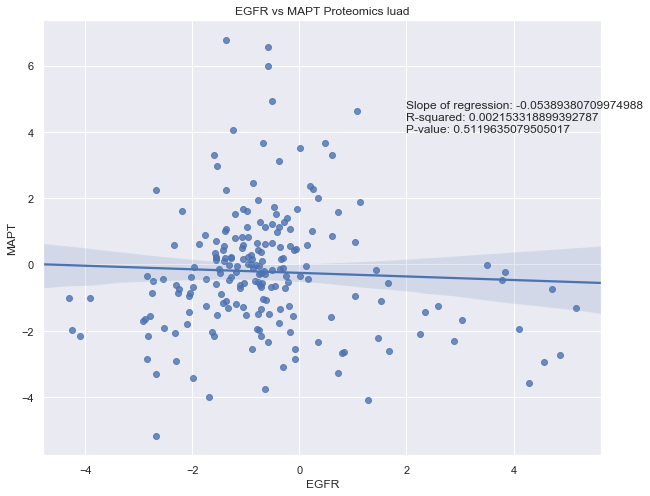

In [93]:
plot_lin_regression(prot_luad,"EGFR","MAPT","EGFR vs MAPT Proteomics luad", ra_stats = True, show_plot = True)

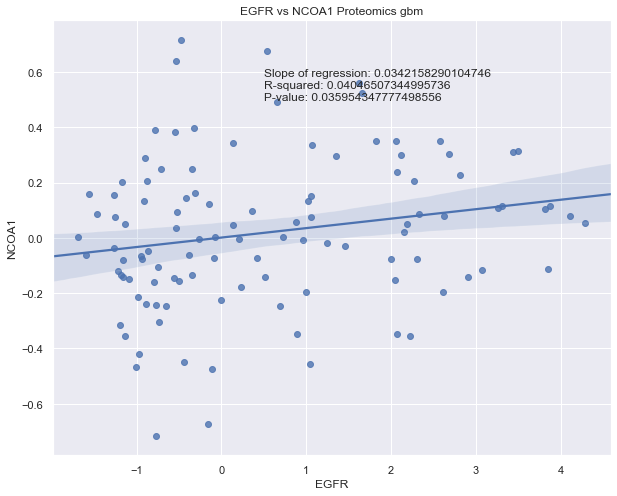

In [98]:
plot_lin_regression(prot_gbm,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics gbm", ra_stats = True, show_plot = True)

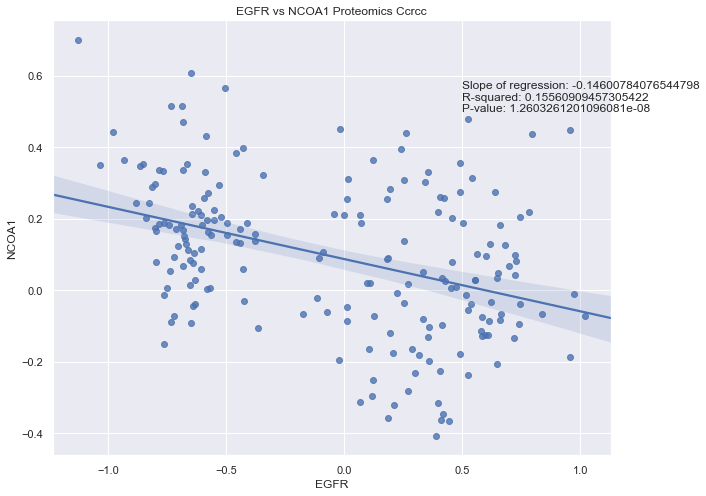

In [99]:
plot_lin_regression(prot_ccrcc,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ccrcc", ra_stats = True, show_plot = True)

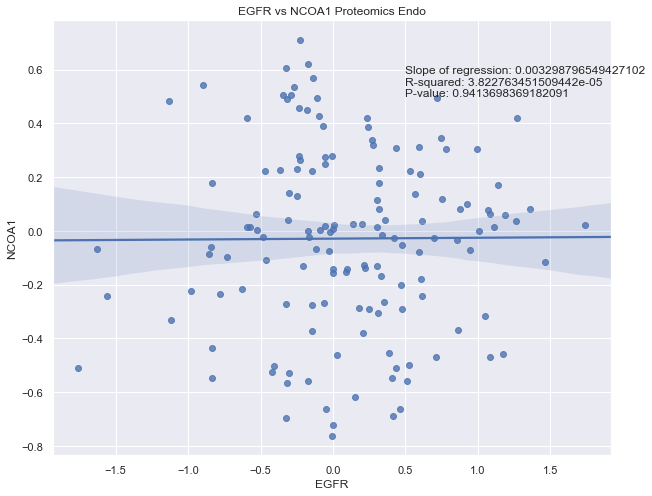

In [101]:
plot_lin_regression(prot_en,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Endo", ra_stats = True, show_plot = True)

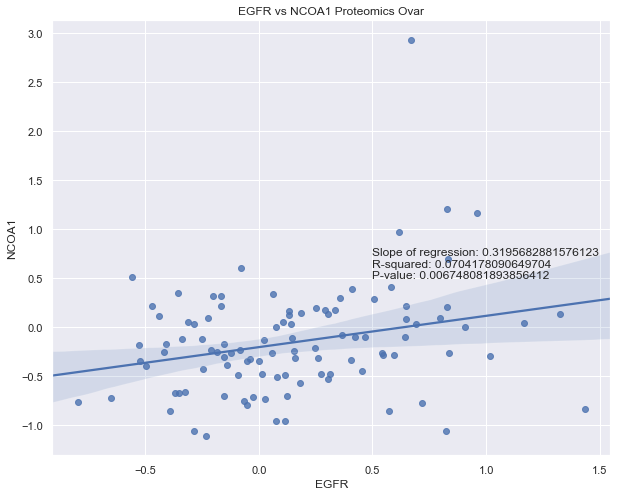

In [102]:
plot_lin_regression(prot_ovar,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Ovar", ra_stats = True, show_plot = True)

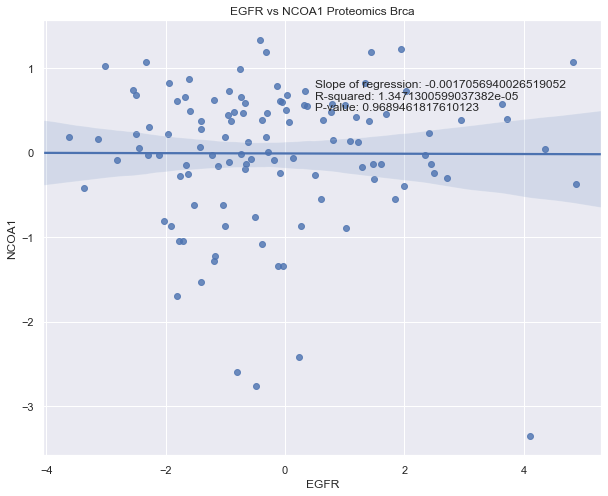

In [103]:
plot_lin_regression(prot_brca,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics Brca", ra_stats = True, show_plot = True)

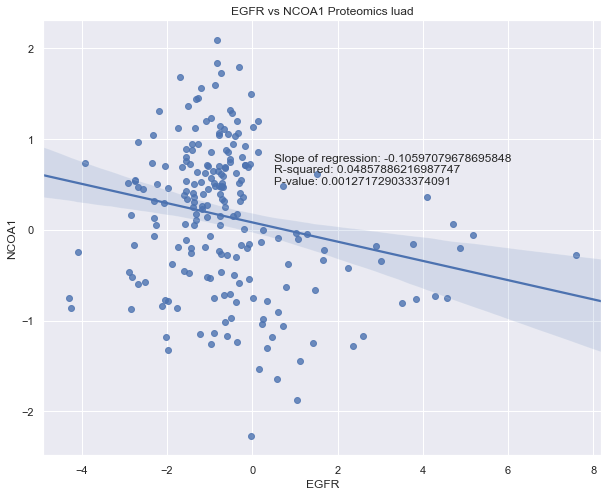

In [104]:
plot_lin_regression(prot_luad,"EGFR","NCOA1","EGFR vs NCOA1 Proteomics luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


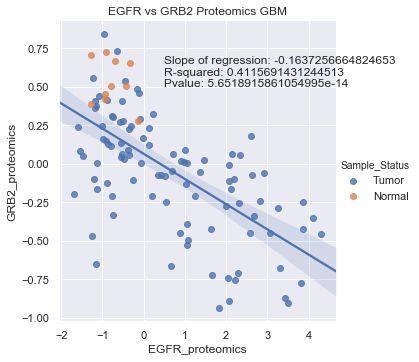

In [253]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics GBM", ra_stats = True, show_plot = True)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


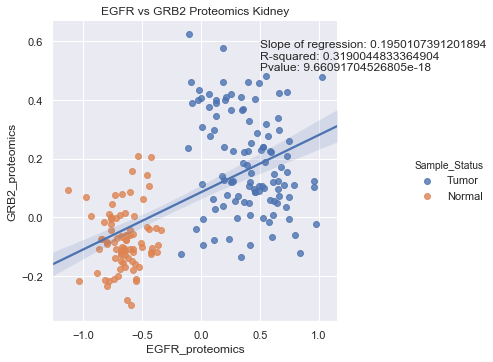

In [256]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


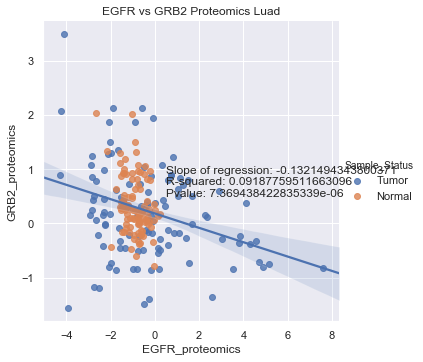

In [259]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)


In [ ]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

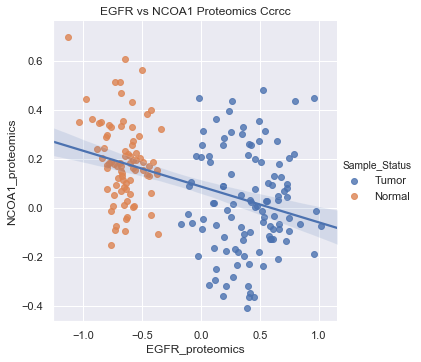

In [182]:
df1_subset = df1[["EGFR_proteomics","NCOA1_proteomics","Sample_Status"]]
df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["EGFR_proteomics"]].values
y1 = df1_subset[["NCOA1_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,8)
graph = sns.lmplot(x= "EGFR_proteomics", y="NCOA1_proteomics", data=df1_subset, hue="Sample_Status", fit_reg=False)
sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
graph.set(title = "EGFR vs NCOA1 Proteomics Ccrcc")
plt.show()
plt.clf()
plt.close()



#plot_lin_regression(EGFR_prot_mut,"EGFR_proteomics","NCOA1_proteomics","EGFR vs NCOA1 Proteomics Hnscc", ra_stats = True, show_plot = True)

In [178]:
df1_subset

Name,EGFR_proteomics,NCOA1_proteomics,Sample_Status
Patient_ID,,,
C3L-00004,0.254999,0.137199,Tumor
C3L-00004.N,-0.812454,0.287768,Normal
C3L-00010,0.526561,-0.056790,Tumor
C3L-00010.N,-0.649554,0.608486,Normal
C3L-00011,0.268540,0.016300,Tumor
...,...,...,...
C3N-01649.N,-0.592099,0.256959,Normal
C3N-01651,0.554559,0.029365,Tumor
C3N-01651.N,-0.631186,-0.037471,Normal


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


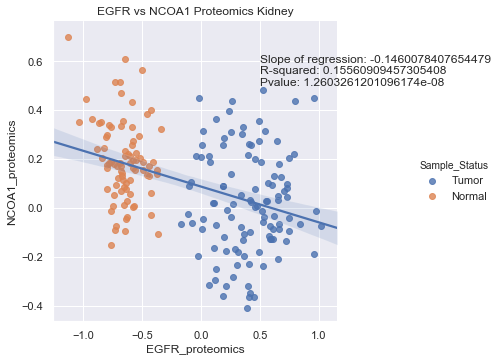

In [229]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["NCOA1","EGFR"])

df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","NCOA1_proteomics", "Sample_Status",title = "EGFR vs NCOA1 Proteomics Kidney", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


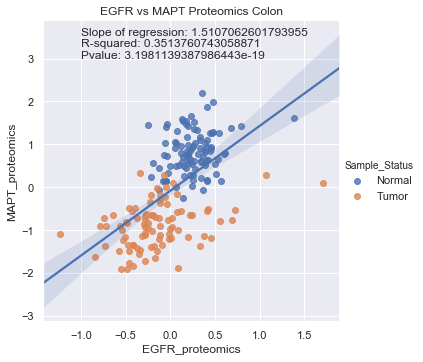

In [219]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Colon", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


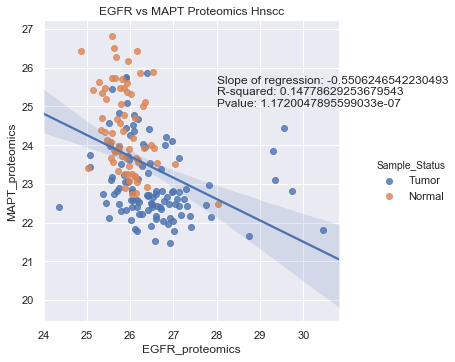

In [221]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


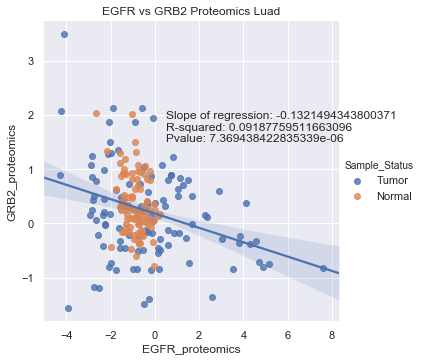

In [264]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Luad", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 102 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


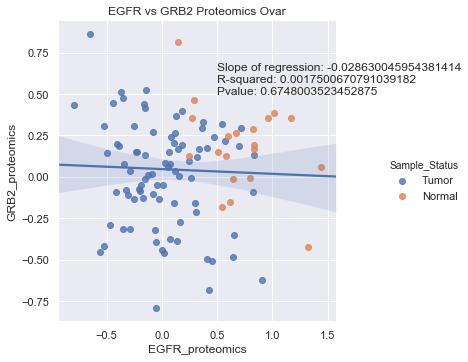

In [268]:
df1 = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Ovar", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


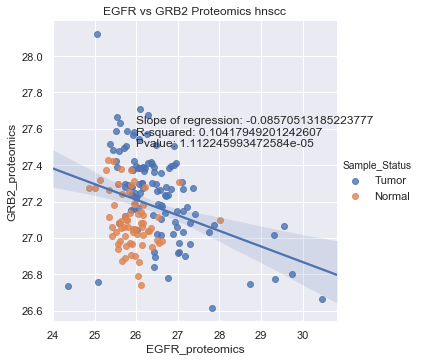

In [275]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


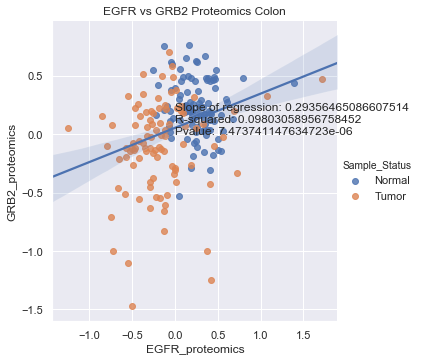

In [278]:
df1 = colon.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["GRB2","EGFR"])
#df1.columns = df1.columns.droplevel(1)
plot_lin_regression(df1,"EGFR_proteomics","GRB2_proteomics", "Sample_Status",title = "EGFR vs GRB2 Proteomics Colon", ra_stats = True, show_plot = True)

In [288]:
df1 = Ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MAPT","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1
#plot_lin_regression(df1,"EGFR_proteomics","MAPT_proteomics", "Sample_Status",title = "EGFR vs MAPT Proteomics Ccrcc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 193 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


Name,EGFR_proteomics,MAPT_proteomics,MAPT_proteomics,MAPT_proteomics,EGFR_Mutation,EGFR_Location,EGFR_Mutation_Status,Sample_Status
Patient_ID,,,,,,,,
C3L-00004,0.254999,-0.719573,NaN,0.358904,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00004.N,-0.812454,-0.328758,NaN,-1.461912,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00010,0.526561,-1.122201,NaN,-0.796236,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3L-00010.N,-0.649554,-0.388174,NaN,-1.350821,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3L-00011,0.268540,-0.711147,NaN,-0.276017,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
...,...,...,...,...,...,...,...,...
C3N-01649.N,-0.592099,-0.036555,NaN,-1.211079,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
C3N-01651,0.554559,-1.563996,NaN,-0.936174,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
C3N-01651.N,-0.631186,0.659668,NaN,-0.478122,[Wildtype_Normal],[No_mutation],Wildtype_Normal,Normal
